In [1]:
from helpers import *

k = 5
p = 50
n = 100
Z, M, B = create_factors(n, k, p+1, sig=1)

# Let rets be the last column of Z 
rets = Z[:, -1]
# redefine Z to be all the other columns except the last one
Z = Z[:, :-1]
 
Z = normalize_columns(Z)
X = Z[:, :k]
# Y = Z[:, k:]

knum = k
Zk, Theta_tru, svd_C = compute_k_truncated_svd(Z, k)

tsms_idx = tsms(Z, Zk, knum)
tsms_smin = smallest_singular_value(Z[:, tsms_idx])

_, Theta_hat = svd_convex_optimization(Z, .5*svd_C, knum)
sgl_idx = top_k_rows_indices(Theta_hat, knum)
sgl_smin = smallest_singular_value(Z[:, sgl_idx])

p1 = PRESS_statistic(rets, X)
p2 = PRESS_statistic(rets, Z)
p3 = PRESS_statistic(rets, Z[:, tsms_idx])
p4 = PRESS_statistic(rets, Z[:, sgl_idx])
print(p1, p2, p3, p4)

105.43172501067355 202.4794301449474 108.07652624932994 108.07652624932994


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers import *

k = 5
n = 100

results = []
p_values = range(10, 81, 10)  # Values: 10, 20, ..., 100
nreps = 100  # Number of repetitions for each p

for p in p_values:
    for rep in range(nreps):
        Z, M, B = create_factors(n, k, p+1, sig=.9)

        rets = Z[:, -1]
        Z = Z[:, :-1]

        Z = normalize_columns(Z)
        X = Z[:, :k]

        knum = k
        Zk, Theta_tru, svd_C = compute_k_truncated_svd(Z, k)

        tsms_idx = tsms(Z, Zk, knum)
        _, Theta_hat = svd_convex_optimization(Z, .5*svd_C, knum)
        sgl_idx = top_k_rows_indices(Theta_hat, knum)

        methods = {
            'X': X,
            'Z': Z,
            'tsms': Z[:, tsms_idx],
            'sgl': Z[:, sgl_idx]
        }

        for method, data in methods.items():
            press_val = PRESS_statistic(rets, data)
            results.append({'p': p, 'method': method, 'PRESS': press_val, 'rep': rep})

df = pd.DataFrame(results)

# Calculate average PRESS across repetitions
averages = df.groupby(['method', 'p']).PRESS.mean().reset_index()

# Define custom labels
labels = {
    'X': 'True factors X',
    'Z': 'All factors Z',
    'tsms': r'$\hat{X}$ from TSMS',
    'sgl': r'$\hat{X}$ from SGL'
}

# Visualization
styles = {
    'X': {'color': 'b', 'linestyle': '-', 'marker': 'o', 'linewidth': 1.5, 'alpha': .5},
    'Z': {'color': 'r', 'linestyle': '--', 'marker': 's', 'linewidth': 1.5, 'alpha': 0.75},
    'tsms': {'color': 'g', 'linestyle': '-.', 'marker': '^', 'linewidth': 2.5, 'alpha': 0.5},
    'sgl': {'color': 'm', 'linestyle': ':', 'marker': 'v', 'linewidth': 2.5, 'alpha': 0.5}
}

for method in averages['method'].unique():
    subset = averages[averages['method'] == method]
    plt.plot(subset['p'], subset['PRESS'], label=labels[method], **styles[method])

plt.xlabel('p')
plt.ylabel('PRESS Statistic')
plt.legend()
plt.tight_layout()
plt.savefig("PRESS_vs_p_avg_enhanced.png", dpi=300)
plt.show()


# # Visualization
# for method in averages['method'].unique():
#     subset = averages[averages['method'] == method]
#     plt.plot(subset['p'], subset['PRESS'], label=labels[method])

# plt.xlabel('p')
# plt.ylabel('PRESS Statistic')
# plt.legend()
# plt.tight_layout()
# plt.savefig("PRESS_vs_p_avg.png", dpi=300)
# plt.show()


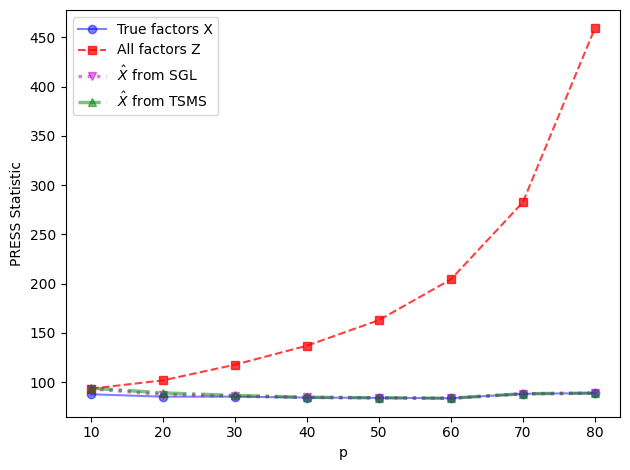

In [4]:
for i in {'a':2, 'b':3}.items():
    print(i)

('a', 2)
('b', 3)
